In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import matplotlib.path as mpath
import matplotlib.cm as cm

import cmocean

In [2]:
file='/Users/alberta/Data/nextsim/experiments/small_arctic_10km_sidfex4/control/SIDFEx_Drifters_20060202.nc'
ds=xr.open_dataset(file)

In [3]:
ds

<xarray.Dataset>
Dimensions:    (time: 117, x: 81, y: 1)
Coordinates:
  * time       (time) datetime64[ns] 2006-02-02 ... 2006-03-03
Dimensions without coordinates: x, y
Data variables:
    longitude  (time, x, y) float32 ...
    latitude   (time, x, y) float32 ...
    index      (time, x, y) int32 ...
    sic        (time, x, y) float32 ...
Attributes:
    Conventions:  CF-1.6
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    source:       neXtSIM model fields

In [4]:
ds.longitude

<xarray.DataArray 'longitude' (time: 117, x: 81, y: 1)>
array([[[-120.927   ],
        [-120.665306],
        ...,
        [ -15.945568],
        [ -12.888417]],

       [[-120.93136 ],
        [-120.66977 ],
        ...,
        [ -15.951274],
        [ -12.894001]],

       ...,

       [[-122.52404 ],
        [-122.33536 ],
        ...,
        [  -2.685953],
        [  -1.508389]],

       [[-122.532745],
        [-122.34429 ],
        ...,
        [  -2.718955],
        [  -1.540381]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-02-02 2006-02-02T06:00:00 ... 2006-03-03
Dimensions without coordinates: x, y
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_north

In [8]:
NT,Nx,Ny=ds.longitude.shape
print(NT,Nx,Ny)


117 81 1


In [9]:
print(np.arange(Nx))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]


In [12]:
colors.shape

(81, 4)

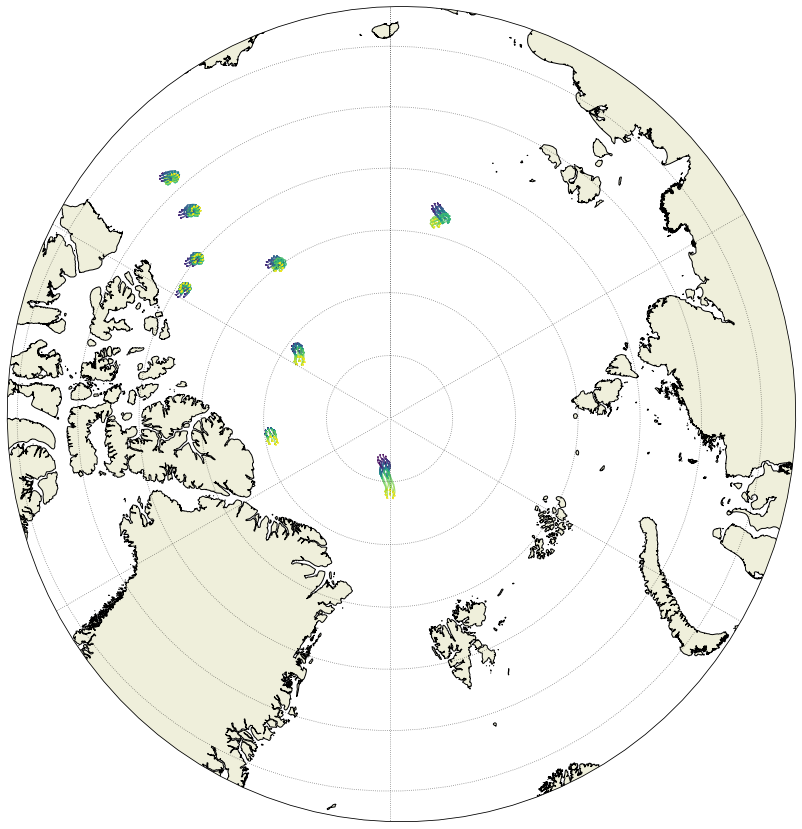

In [18]:
plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
#ax = plt.axes(projection=ccrs.NorthPolarStereo()) 
ax.set_extent([-180, 180, 70, 90], ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

colors = cm.rainbow(np.linspace(0, 1, Nx))
for x in np.arange(Nx):
    plt.scatter(ds.longitude[:,x,:],ds.latitude[:,x,:],c=ds.time,s=0.1,transform=ccrs.PlateCarree())